# End-of-Module Assessment 2

## Instructions

Please read and follow these instructions and specifications carefully.  

1. This test is available from now until August 6 (Friday), 11:59 PM.
2. This test covers Module 5, which is about data analysis using libraries. However, you will need fundamental skills from Modules 2 to 4 to do this test properly.
3. This test is by project group. 
4. You are allowed to use the specified non-standard libraries for this test: `pandas`, `numpy`, and `matplotlib`. You are allowed to use any standard library for this test.
5. Answers to problems that are hard-coded, done in another program such as Excel, or go against the learning outcomes in any other manner will be given no credit. If you are unsure whether your approach to a problem goes against the learning outcomes, ask.  
6. We reserve the right to scrutinize answers to problems that significantly go against the philosophy of a library. For example, if you answer a Pandas item mostly using vanilla Python loops and data structures, you go against the philosophy of Pandas (and NumPy), which is to _vectorize_ your operations as much as you can. We reserve the right to scrutinize your answer accordingly.
7. You are encouraged to use only the provided code cell for each number. However, if you _need_ more cells, you may add them. If you do add more cells, make sure to label them very clearly. Code cells that are not clearly labelled will not be checked.
8. If you are asked to output files, please write them all to the `output` folder. If your kit does not have an `output` folder, you may make one.

Submission instructions for normal (i.e., not cross-section) groups:
1. Assign a group leader. The leader is who will submit the assessment.
2. The leader must create a NEW GitHub repository. This repository is what they will submit to the Canvas assignment to indicate that the group has submitted. They should name this repository SECTION-GROUPNUM-EOMA2 (e.g., A-5-EOMA2).
3. The leader must upload the contents of this folder to the repository. This includes the EOMA2.ipynb file, the output folder, and all section folders.
4. To officially submit the assignment, the group leader must upload the link to the GitHub repository and ALL GROUP MEMBERS' COAs to the Canvas assignment.

Submission instructions for cross-section groups:
1. Assign a group leader. The leader is who will create the GitHub repository, and they are who will add the required files to the GitHub repository. 
2. The leader must create a NEW GitHub repository. They should name this repository GROUPNAME-EOMA2 (e.g., CS1-EOMA2). 
3. The leader must upload the contents of this folder to the repository. This includes the EOMA2.ipynb file, the output folder, and all section folders.
4. Since your group is split across sections, your group must choose one member per represented section to submit the exact same file kit to their respective section's Canvas assignment. For example, if all sections (A, G, and H) are represented in your group, choose one person per section (i.e., 3 people) to submit your EOMA2 submission to their respective section's Canvas assignment. If only two sections are represented, then only 2 submissions (i.e., one per represented section, so in this case 2) must be submitted. Please note that we will quite literally not give a grade to students in cross-section groups who are not represented by a submission for their section. 


## Section 1: Financial Data (75 points)

### Context

You are a freelance data consultant. You were hired by a firm that sells historical data on the prices of cryptocurrencies in bulk to aspiring quantitative analysts. However, a freak flood in their data center corrupted their databases, causing their data to be damaged. It is now up to you to fix their data and to polish it into a form that is presentable and acceptable to one of their biggest clients.  

The client firm provided you with six sample corrupted files:  
1. `./section1/CORRUPTED-AC-ALLDAYS-07-2021.csv`
2. `./section1/CORRUPTED-CC-ALLDAYS-07-2021.csv`
3. `./section1/CORRUPTED-DC-ALLDAYS-07-2021.csv`
4. `./section1/CORRUPTED-EC2-ALLDAYS-07-2021.csv`
5. `./section1/CORRUPTED-NC-ALLDAYS-07-2021.csv`
6. `./section1/CORRUPTED-SHC-ALLDAYS-07-2021.csv`  

Each of these sample files represents the price history of a cryptocurrency from January 1, 2015 to December 31, 2019. Remember that these are just _sample_ files and that the true database is many thousands of files large. (The client firm declined to share their entire database for information security reasons.) As such, **you are expected to perform these operations in Pandas instead of vanilla Python to increase the efficiency of your scripts when they are eventually deployed to their servers**.  

You have surveyed the data a little, and it is clear to you that all of the data sets suffer from the same defects. (In other words: the files are all damaged _in the same way_.) It is also clear to you that you will be working with dates. You think to yourself: maybe there's a library for this.  

The client did not provide any sample output.

### 1.1  

The client wants you to repair each of the damaged files by following these rules:
1. Some of the date values are missing. They want you to ensure that all dates have a row in the repaired files, and they want you to fill the price value of the repaired rows with the most recent valid price value. If there is no most recent valid price value, use the next valid price value.
2. The clients also want you to remove rows with dates that are on weekends. They acknowledge that this is strange given that cryptocurrencies are traded nonstop, but they explain that it is because their own clients come from a banking background and that their clients specifically requested it.  

Save each of the repaired files as `./output/REPAIRED-{CODE}-ALLDAYS-07-2021.csv`. So, for example, `./section1/CORRUPTED-AC-ALLDAYS-07-2021.csv` will be repaired and saved as `./output/REPAIRED-AC-ALLDAYS-07-2021.csv`.  

Do not include the dataframe index when saving the dataframes to csv.

In [139]:
# CODE CELL 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import *

codes = ['AC','CC','DC','EC2','NC','SHC']
# CODE START
for x in codes:
    df = pd.read_csv(f"./section1/CORRUPTED-{x}-ALLDAYS-07-2021.csv")
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index(['date'])
    df=df.asfreq(freq='D', how={'start':'2015-01-01', 'end':'2020-01-01'},method='ffill') # FILLING UP OF MISSING DATES
    df = df.asfreq(BDay()) # removing of weekends using the pandas.tseries.offsets
    df.to_csv(f"./output/REPAIRED-{x}-ALLDAYS-07-2021.csv")

### 1.2

The client also wants you to _aggregate_ the data so that it is easier to make it portable and so that it is easier to create chart thumbnails from the data. They want you to follow these rules:
1. They want you to use the _repaired files_ as the basis data for this task.
2. They want you to group the data by _month_ and for the price to be the average of all of the data entries that fall within the respective month. In other words, each row should have two columns: `month` and `average_price`. `month` should be a string formatted as {YEAR}-{MONTHNUM} (e.g., 2015-1 for January 2015), and `average_price` should simply be the float value of the average price of all data entries that belong to that month.  

Save each of the transformed files as `./output/AGGREGATED-{CODE}-ALLDAYS-07-2021.csv`. So, for example, `./output/REPAIRED-AC-ALLDAYS-07-2021.csv` will be aggregated and saved as `./output/AGGREGATED-AC-ALLDAYS-07-2021.csv`  

Do not include the dataframe index when saving the dataframes to csv.

In [140]:
# CODE CELL
import pandas as pd

# CODE START
codes = ['AC','CC','DC','EC2','NC','SHC']
for x in codes:
    df = pd.read_csv(f"./output/REPAIRED-{x}-ALLDAYS-07-2021.csv")
    df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.strftime('%Y-%m')
    df = df.set_index(['date'])
    df = df.groupby(by = df.index).mean()
    df['average_price'] = df['price']
    df.drop(columns=["price"]).to_csv(f"./output/AGGREGATED-{x}-ALLDAYS-07-2021.csv")
# CODE END

### 1.3

Finally, the client wants you to generate charts that they can use as thumbnails for their data products. They want you to follow these rules:
1. They want you to use the _aggregated files_ as the basis data for this task.
2. They want you to visualize the aggregated data as a line chart. Use the `month` column as the x-axis and the `average_price` column as the y-axis.  

Save each of the generated charts as `./output/CHART-{CODE}.png`. So, for example, `./output/AGGREGATED-AC-ALLDAYS-07-2021.csv` will be charted and saved as `./output/CHART-AC.png`.

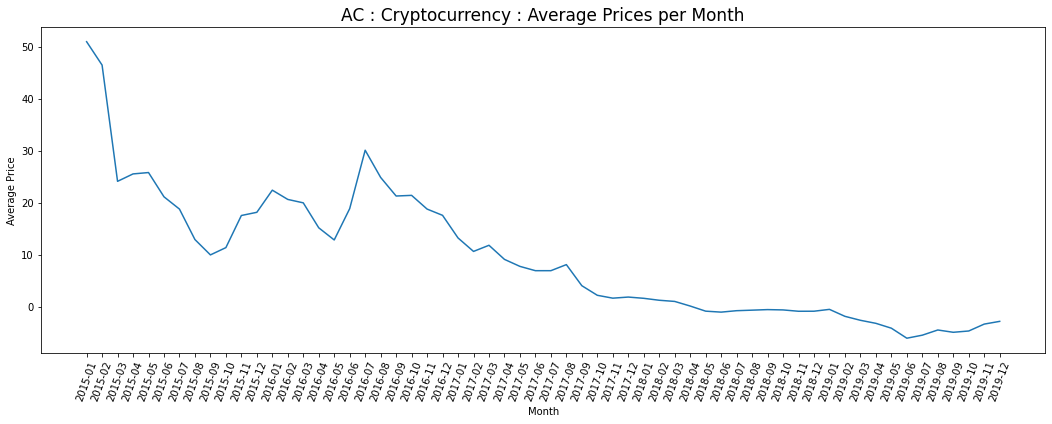

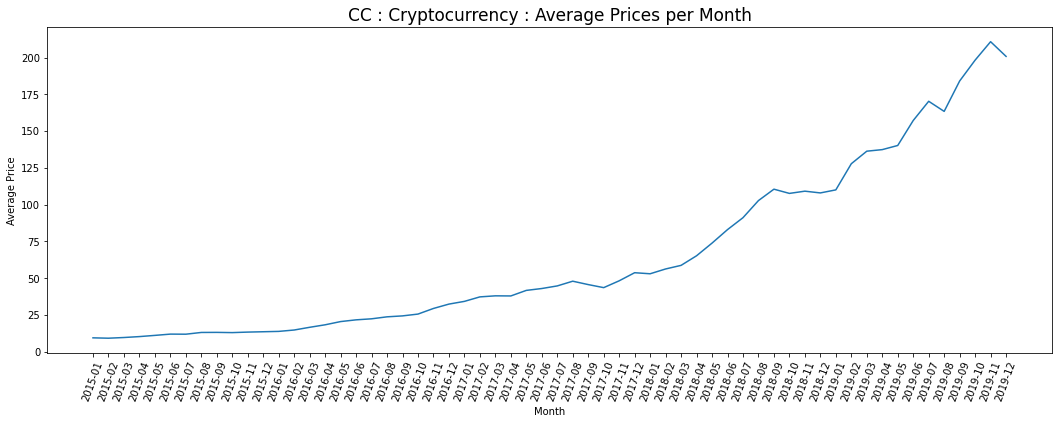

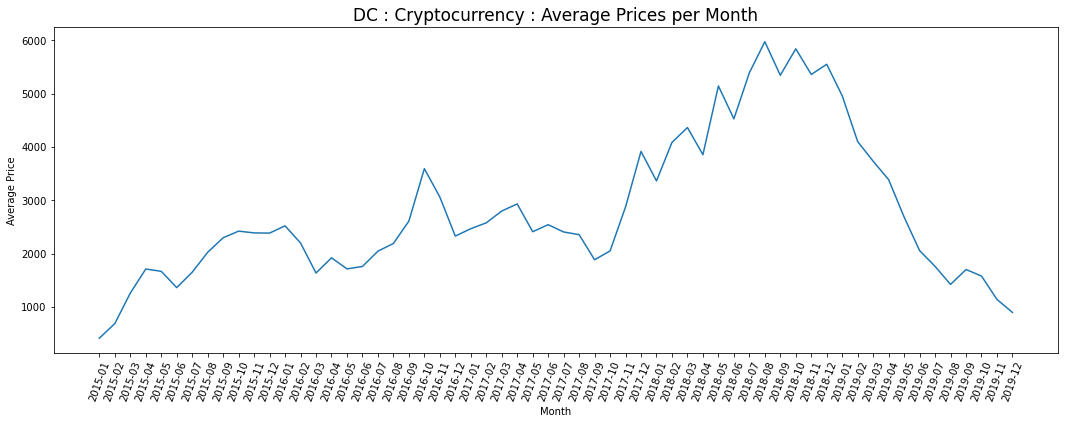

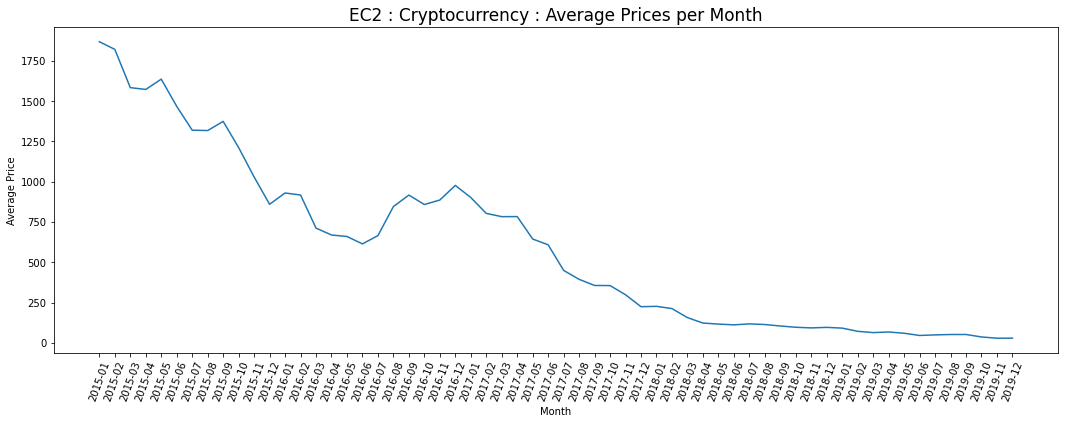

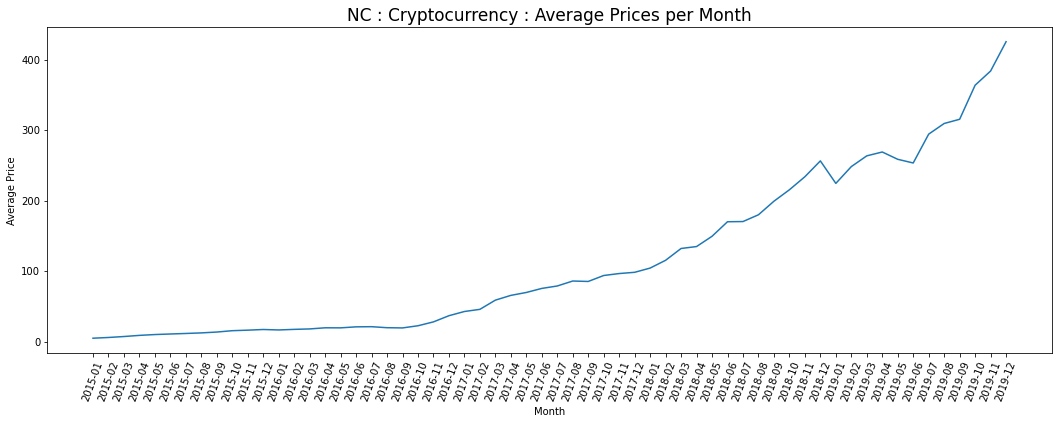

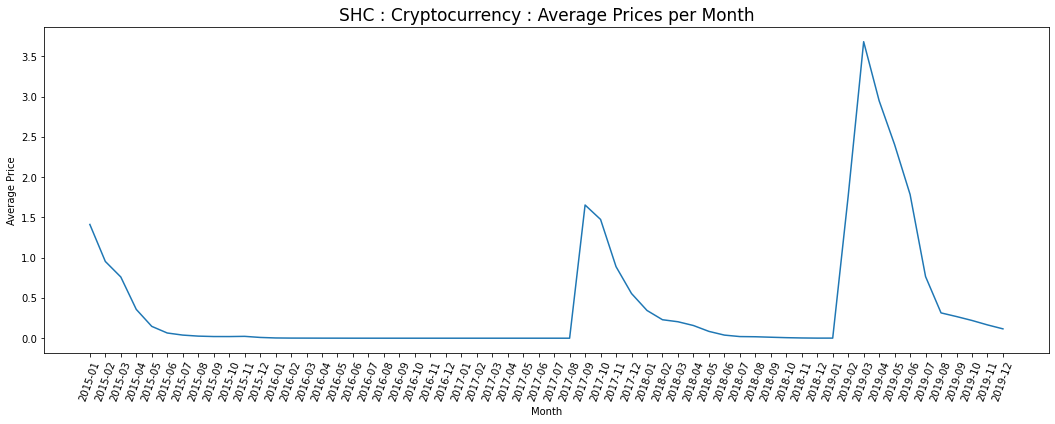

In [141]:
# CODE CELL
import pandas as pd
import matplotlib.pyplot as plt

# CODE START
codes = ['AC','CC','DC','EC2','NC','SHC']

for x in codes:
    df = pd.read_csv(f"./output/AGGREGATED-{x}-ALLDAYS-07-2021.csv")
    
    fig, axes = plt.subplots(figsize=(18,6))

    axes.plot(df['date'], df['average_price'])

    axes.set_xlabel("Month")
    axes.set_ylabel("Average Price")
    axes.set_title(f"{x} : Cryptocurrency : Average Prices per Month", fontsize = 17)
    plt.xticks(rotation = 70)
    fig.savefig(f"./output/CHART-{x}.png")
#CODE END

## Section 2: Cleaning Marketing Data (75 points)

### Context

You are a freelance data consultant. You were hired by a marketing firm that collects customer data for their clients, which are big fast-moving-consumer-goods (FMCG) firms. Your client, the marketing firm, currently handles their operations through a "multi-channel" approach. (To grossly oversimplify, a multi-channel approach to marketing means that a brand can interact with customers across more than one channel). However, they would like to upgrade their system to use an "omni-channel" approach. (An omni-channel approach means that a customer can be recognized across multiple channels. This is important because you will be able to personalize their experience better.)  

Your client currently has three main data sets:  
1. Manual interaction (`./section2/raw-manual.csv`)
2. Website interaction (`./section2/raw-website.csv`)
3. Email interaction (`./section2/raw-email.csv`)

They task you with cleaning and merging their data to help them establish their omni-channel capabilities.  

Again, you are to use Pandas for this, because your client's real databases are much, much bigger than these samples.

### 2.1

Your client first asks you to clean up their data. They want their data to follow these rules:  
1. Emails must not have any capital letters.  
2. Mobile numbers must be formatted as `+63XXXXXXXXXX` (e.g., +639174005892).
3. All the fields (fname, lname, email, and mobile) must be filled.
4. The fields must only contain data relevant to them; they must not contain data that does not belong in their column.

You have surveyed the data a little, and you have determined that though the data is dirty, it at least adheres to the following patterns:
1. All of the emails adhere to the email standard at https://emailregex.com/. (That's a hint.)
2. There are only 4 different "patterns" under the `mobile` columns per data set. (An empty field is not one of these 4 patterns).
3. The manual data set appears to have sometimes merged the `email` value and the `mobile` value into the `email` column and left the `mobile` column empty. The mobile value in these defective columns may be any one of the 4 different "patterns" that mobile numbers follow.  

Perform this cleanup on each of the three raw data sets.  

Save the cleaned data sets as `./output/cleaned-{dataset_name}.csv`. So, for example, `./section2/raw-manual.csv` will be cleaned and saved as `./output/cleaned-manual.csv`.  

Do not include the dataframe index in the output csv.

In [142]:
# CODE CELL
import pandas as pd
import numpy as np
import re # That's a hint.

# CODE START

# ------------------------------------------------- MANUAL ----------------------------------------------------

filename = "./section2/raw-manual.csv"
manual_df = pd.read_csv(filename)

#COLUMNS 
#convert to string
manual_df = manual_df.astype({"email": str})

#split the emails to new df
new_manual_df = manual_df['email'].str.split("/", n = 1, expand = True)

#copy new df columns to old df
manual_df['nemail']=new_manual_df[0]
manual_df['nmobile']=new_manual_df[1]

#remove NaN/NA and combine 2 mobile columns
manual_df['fmobile'] = manual_df['mobile'].fillna('') + manual_df['nmobile'].fillna('')

#remove extra columns
manual_df.drop(columns=['email', 'mobile', 'nmobile'], inplace=True)

#rename columns
manual_df['email']=manual_df['nemail']
manual_df['mobile']=manual_df['fmobile']

#rearrange columns
cols = ['email', 'fname', 'lname', 'mobile']
manual_df = manual_df[cols]

#EMAILS
#convert to string
manual_df = manual_df.astype({"email": 'string'})

#capitalize emails
manual_df['email']=manual_df['email'].str.replace(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)",
                                              lambda x:x.group(0).lower())

#NUMBERS
manual_df.mobile = manual_df.mobile.str.replace(' ', '')
manual_df.mobile=np.where(manual_df.mobile.str.startswith('63'),'+' + manual_df.mobile,manual_df.mobile)
manual_df.mobile=np.where(manual_df.mobile.str.startswith('09'),'+63'+ 
manual_df.mobile.str[1:],manual_df.mobile)
manual_df.mobile=np.where(manual_df.mobile.str.startswith('9'),'+63'+ manual_df.mobile,manual_df.mobile)

#CSV FILE
manual_df.to_csv("./output/cleaned-manual.csv", index=False)


# ------------------------------------------------- WEBSITE ----------------------------------------------------
filename = "./section2/raw-website.csv"
website_df = pd.read_csv(filename)

#EMAILS
#Convert to String
website_df = website_df.astype({"email": 'string'})

#Capitalize Emails
website_df['email']=website_df['email'].str.replace(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)",
                                              lambda x:x.group(0).lower())

#NUMBERS
website_df.mobile = website_df.mobile.str.replace(' ', '')
website_df.mobile=np.where(website_df.mobile.str.startswith('63'),'+' + website_df.mobile,website_df.mobile)
website_df.mobile=np.where(website_df.mobile.str.startswith('09'),'+63'+ 
website_df.mobile.str[1:],website_df.mobile)
website_df.mobile=np.where(website_df.mobile.str.startswith('9'),'+63'+ website_df.mobile,website_df.mobile)

#CSV 
website_df.to_csv("./output/cleaned-website.csv", index=False)

# ------------------------------------------------- EMAILS ----------------------------------------------------

filename = "./section2/raw-email.csv"
email_df = pd.read_csv(filename)
email_df  

#EMAILS
#Convert to String
email_df = email_df.astype({"email": 'string'})

#Capitalize Emails
email_df['email']=email_df['email'].str.replace(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)",
                                              lambda x:x.group(0).lower())

#NUMBERS
email_df.mobile = email_df.mobile.str.replace(' ', '')
email_df.mobile=np.where(email_df.mobile.str.startswith('63'),'+' + email_df.mobile,email_df.mobile)
email_df.mobile=np.where(email_df.mobile.str.startswith('09'),'+63'+ 
email_df.mobile.str[1:],email_df.mobile)
email_df.mobile=np.where(email_df.mobile.str.startswith('9'),'+63'+ email_df.mobile,email_df.mobile)

#test 
email_df.to_csv("./output/cleaned-email.csv", index=False)

# CODE END

### 2.2

Your client wants you to generate a comprehensive list of the identities present in their scattered data. Their specifications are as follows:
1. Use the cleaned data from 2.1 as your data source.
2. Use the emails as the indicator of a unique identity.
3. Sort the final file by the email in alphabetical order.

Save the cleaned data sets as `./output/merged-identities.csv`.  

Do not include the dataframe index in the output csv.

In [143]:
# CODE CELL
import pandas as pd

# CODE START

#merge all csvs
merged_df = pd.concat(map(pd.read_csv, ["./output/cleaned-website.csv", "./output/cleaned-email.csv","./output/cleaned-manual.csv"]), ignore_index=True)

#remove duplicates
merged_df.sort_values("email", inplace = True)
merged_df.drop_duplicates(subset ="email",keep = 'first', inplace = True)

#alphabetical order
merged_df.sort_values('email', ascending=False)

#add + again
merged_df['mobile'] = merged_df['mobile'].astype(str)
merged_df.mobile = np.where(merged_df.mobile.str.startswith('63'),'+' + merged_df.mobile,merged_df.mobile)

#CSV
merged_df.to_csv("./output/merged-identities.csv", index=False)

# CODE END